# Лабораторная работа №4
# 6132 Курицын Никита

In [208]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def display_2Images(image_1: np.ndarray,names_image_1: str, image_2: np.ndarray,names_image_2: str):
     fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
     axes_1[0].imshow(image_1,cmap = 'gray')
     axes_1[0].set_title(names_image_1)
     axes_1[0].axis('off')
    
     axes_1[1].imshow(image_2,cmap = 'gray')
     axes_1[1].set_title(names_image_2)
     axes_1[1].axis('off')

1. Считать цветное rgb изображение. Преобразовать в градации серого.

In [179]:
def transform_image_to_gray(image: np.ndarray):
    return (np.dot(image[..., :3], np.array([0.3, 0.59, 0.11])))

In [180]:
ORIGINAL_image = cv2.imread("ph_1.jpg") #загрузка оригинального изображения

In [181]:
RGB_image = cv2.cvtColor(ORIGINAL_image, cv2.COLOR_BGR2RGB)
GRAY_image = transform_image_to_gray(RGB_image) 

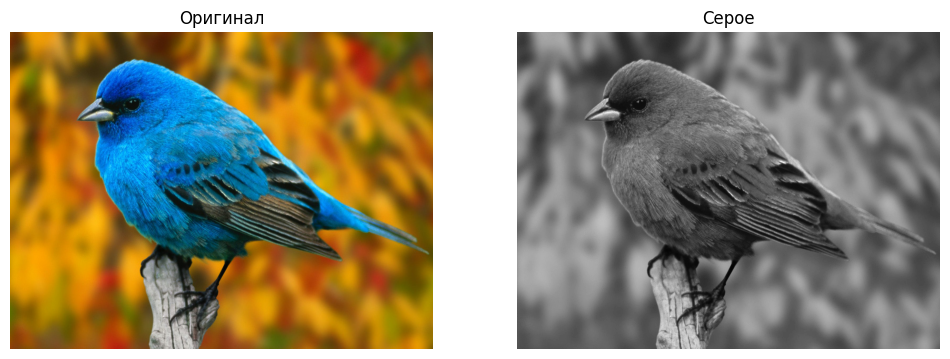

In [182]:
display_2Images(RGB_image,"Оригинал",GRAY_image,"Серое")

2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод.

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [183]:
def threshold(image, threshold_value):
    thresholded_image = np.zeros_like(image)
    thresholded_image[image > threshold_value] = 255
    return thresholded_image

In [196]:
def func_Conv(image: np.ndarray, kernel):
    ConvImage = np.zeros_like(image)
    window_size_0 = kernel.shape[0] // 2
    window_size_1 = kernel.shape[1] // 2
    k_1 = 1
    k_2 = 1
    if kernel.shape[0] % 2 != 0:
        k_1 += 1
    if kernel.shape[1] % 2 != 0:
        k_2 += 1
    paddedImage = np.pad(image, (window_size_0,window_size_1), mode='edge')
    kernel = np.flipud(np.fliplr(kernel))
    for i in range(ConvImage.shape[0]):
        for j in range(ConvImage.shape[1]):
            full_screen = paddedImage[i - window_size_0 + 1:i + window_size_0 + k_1, j - window_size_1 + 1:j + window_size_1 + k_2]
            ConvImage[i, j] = np.sum(full_screen * kernel)   
    return ConvImage


In [197]:
def contourGradient_method(image: np.ndarray, kernel1 = np.array([[0,0],[-1,1]]), kernel2 = np.array([[0,-1],[0,1]])):
    finalImage = np.zeros_like(image)
    gradient_x = func_Conv(image, kernel1)
    gradient_y = func_Conv(image, kernel2)
    grad = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    finalImage[grad > 10] = 255
    return finalImage

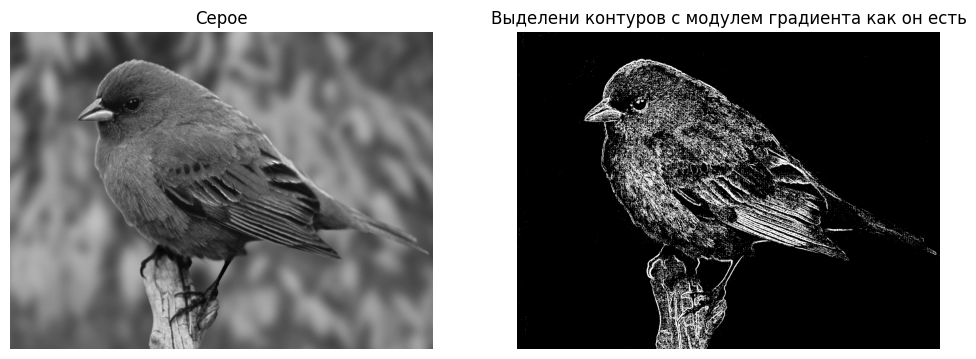

In [198]:
gradImage = contourGradient_method(GRAY_image)
display_2Images(GRAY_image,"Серое",gradImage,"Выделени контуров с модулем градиента как он есть")

3. Сделать выделение контуров методом по вариантам.

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [201]:
def contourLaplace_method(image:  np.ndarray , kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])):
    finalImage = np.zeros_like(image)
    grad = np.abs(func_Conv(image,kernel))
    finalImage[grad > 10] = 255
    return finalImage

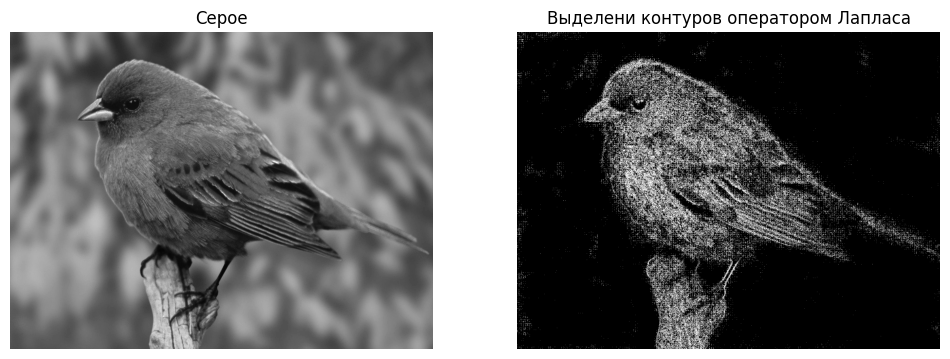

In [202]:
Lapl_Image = contourLaplace_method(GRAY_image)
display_2Images(GRAY_image,"Серое",Lapl_Image,"Выделени контуров оператором Лапласа")

4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам.

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

In [205]:
def contourAgree_method(image:  np.ndarray , kernel_A = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),kernel_B = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])):
    finalImage = np.zeros_like(image)
    A = func_Conv(image,kernel_A)
    B = func_Conv(image,kernel_B) 
    grad = np.sqrt(A ** 2 + B ** 2)
    finalImage[grad > 35] = 255
    return finalImage

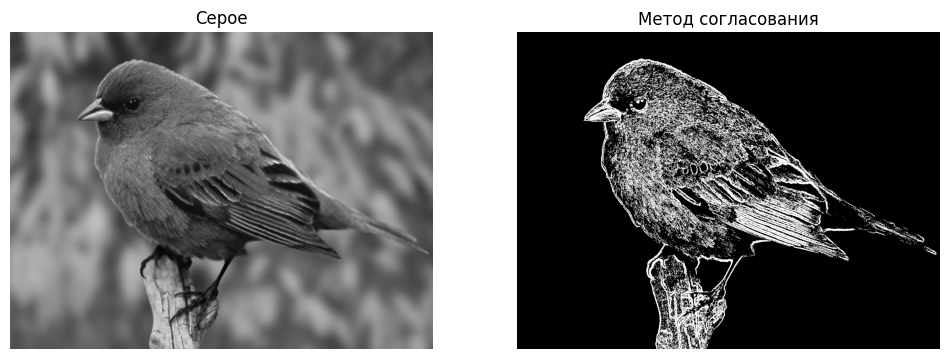

In [206]:
AgreeImage = contourAgree_method(GRAY_image)
display_2Images(GRAY_image,"Серое",AgreeImage,"Метод согласования")

5. Сделать выделение контуров методом Canny (Функция OpenCV).

Вход: изображение из пункта 1
Вывод: бинарное изображение с контурами

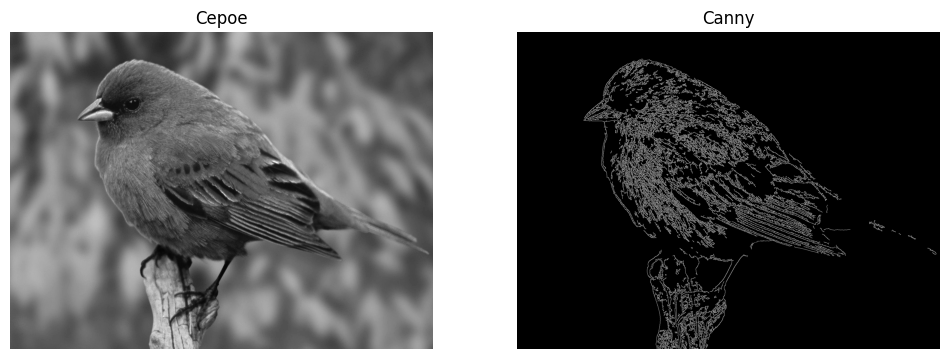

In [211]:
CannyImage = cv2.Canny(GRAY_image.astype(np.uint8), 50, 140)
display_2Images(GRAY_image,"Серое",CannyImage,"Canny")